In [8]:
"""
Data generation
"""
import random
import math
import matplotlib.pyplot as plt

def generate_circle(n,radius=1):
    """
    Data generated on a circle
    """
    pts = []
    count = 0
    while len(pts) < n:
        x,y = random.uniform(-radius,radius),random.uniform(-radius,radius)
 
        if x*x+y*y <= radius:
            x+=1
            y+=1
            pts.append((x,y))
        count+=1
    # print("Done generating")
    return pts
    
def generate_circle_circumference(n,radius=1):
    """
    Data generated on the boundary of a circle
    """
    points = []
    for _ in range(n):
        angle = random.random()
        x = radius*math.cos(angle*2*math.pi)
        y = radius*math.sin(angle*2*math.pi)
        points.append((x,y))
    return points

def generate_square(n,length=1):
    """
    Data generated on a square
    """
    return [(random.uniform(0, length),random.uniform(0, length)) for i in range(n)]

def generate_poly(n):
    """
    Data generated on the curve y = x**2
    """
    x,y = 0,0
    pts = []
    for _ in range(n):
        x += random.uniform(0, 1)
        y = x**2
        pts.append((x,y))
    return pts

def generate_fixed_sized_disk(n,h):
    """
    Data generated on a disk, and ensures hullsize = h
    """
    inner_points = generate_circle(n-h)
    sqrt2 = math.sqrt(2)
    hull_points = [ (sqrt2,sqrt2) , (-sqrt2,sqrt2) , (sqrt2,-sqrt2) , (-sqrt2,-sqrt2) ]
    return inner_points + hull_points + generate_circle_circumference(h-4,radius=2)

# generators = [generate_circle,generate_circle_circumference,generate_square,generate_poly]
generators = [generate_square, generate_circle_circumference]
def plot(random_points,ch):
    plt.plot(*list(zip(*random_points)),"r.")
    plt.plot(*list(zip(*ch)),"g-")
    plt.show()
counter_left_turn = 0
def left_turn(p1,p2,p3):
    x1,y1 = p1
    x2,y2 = p2
    x3,y3 = p3
    global counter_left_turn
    counter_left_turn += 1
    return x1*(y2-y3)+x2*(y3-y1)+x3*(y1-y2) >= 0

def test_convex_hull(CH_algo,n):
    for generator in generators:
        print(generator.__doc__)
        random_points = generator(n)
        ch = CH_algo(random_points)
        plot(random_points,ch)
    # print(generate_fixed_sized_disk.__doc__)
    # random_points = generate_fixed_sized_disk(n,10)
    # ch = CH_algo(random_points)
    # plot(random_points,ch)


    Data generated on a square
    


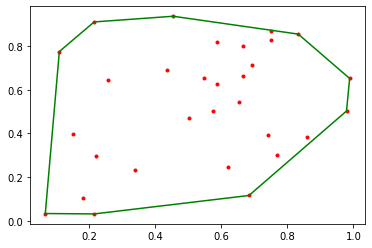


    Data generated on the boundary of a circle
    


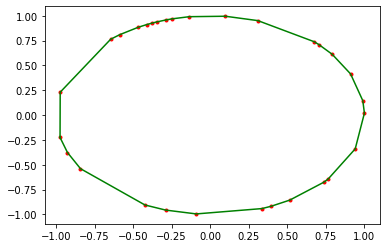

In [9]:
def partition(arr, low, high):
    i = (low-1)         # index of smaller element
    pivot = arr[high]     # pivot
  
    for j in range(low, high):
  
        # If current element is smaller than or
        # equal to pivot
        if arr[j] <= pivot:
  
            # increment index of smaller element
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
  
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)
  
# The main function that implements QuickSort
# arr[] --> Array to be sorted,
# low  --> Starting index,
# high  --> Ending index
  
# Function to do Quick sort
  
def quickSort(arr, low, high):
    if len(arr) == 1:
        return arr
    if low < high:
  
        # pi is partitioning index, arr[p] is now
        # at right place
        pi = partition(arr, low, high)
  
        # Separately sort elements before
        # partition and after partition
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)
  

"""
Part A Graham's Scan
"""

def INC_CH(pointss):
    """
    Graham's Scan
    """
    points = pointss
    quickSort(points, 0, len(points)-1)
    # print(points)
    # points = sorted(pointss)
    upper = points[0:2]
    for p in points[2:]:
        while len(upper)>=2 and left_turn(upper[-2], upper[-1], p):
            upper.pop()
        upper.append(p)
    points.reverse()
    lower = points[0:2]
    for p in points[2:]:
        while len(lower)>=2 and left_turn(lower[-2], lower[-1], p):
            lower.pop()
        lower.append(p)
    return upper + lower

test_convex_hull(INC_CH,30)


    Data generated on a square
    


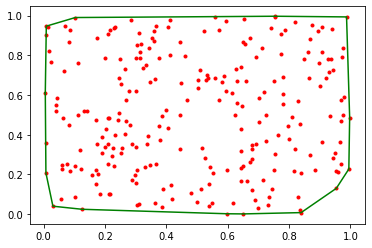


    Data generated on the boundary of a circle
    


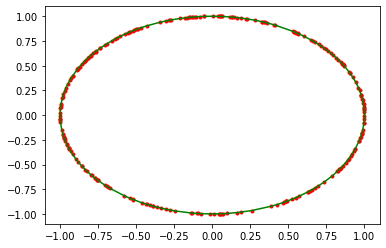

In [10]:
"""
Part B Gift Wrapping
"""

from copy import deepcopy

def GIFT_CH(pts):
    """
    Gift Wrapping
    """
    count = 0
    points = deepcopy(pts)
    p_start = min(points)
    CH = [p_start]
    p_left = p_start
    q = points[0] if not points[0] == p_start else points[1]
    while True:
        for z in points:
            if z == q:
                continue
            if not left_turn(p_left,z,q):
                q = z
        CH.append(q)
        if q in points:
            points.remove(q)
        if points:
            p_left = q
            q = points[0]
        else:
            break
        if p_left == p_start:
            break
    return CH

test_convex_hull(GIFT_CH,250)

In [11]:
def INC_CH_upper(pointss):
    """
    Graham's Scan
    """
    points = pointss
    quickSort(points, 0, len(points)-1)
    # print(points)
    # points = sorted(pointss)
    upper = points[0:2]
    for p in points[2:]:
        while len(upper)>=2 and left_turn(upper[-2], upper[-1], p):
            upper.pop()
        upper.append(p)
    points.reverse()
    lower = points[0:2]
    for p in points[2:]:
        while len(lower)>=2 and left_turn(lower[-2], lower[-1], p):
            lower.pop()
        lower.append(p)
    return upper
def INC_CH_lower(pointss):
    """
    Graham's Scan
    """
    points = pointss
    quickSort(points, 0, len(points)-1)
    # print(points)
    # points = sorted(pointss)
    upper = points[0:2]
    for p in points[2:]:
        while len(upper)>=2 and left_turn(upper[-2], upper[-1], p):
            upper.pop()
        upper.append(p)
    points.reverse()
    lower = points[0:2]
    for p in points[2:]:
        while len(lower)>=2 and left_turn(lower[-2], lower[-1], p):
            lower.pop()
        lower.append(p)
    return lower


    Data generated on a square
    


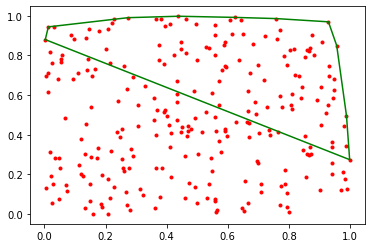


    Data generated on the boundary of a circle
    


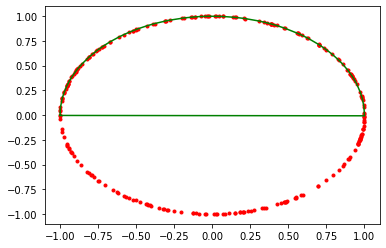


    Data generated on a square
    


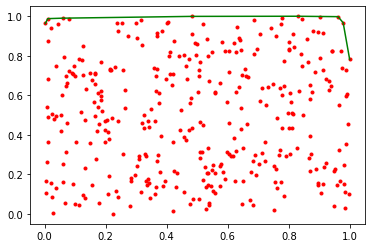


    Data generated on the boundary of a circle
    


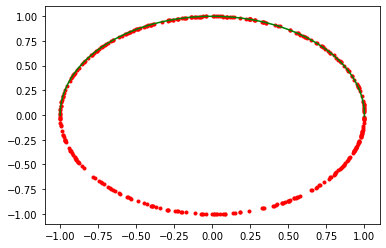

In [12]:
"""
Part C Chan's Algorithm
"""
TURN_LEFT, TURN_RIGHT, TURN_NONE = (1, -1, 0)

from copy import deepcopy
import math
def compute_tangent_binary(pts, p):
    low = 0
    high = len(pts)-1
    counter = 0
    if(len(pts)==2 and p in pts):
        # print("stop")
        # print(pts)
        # print("short circuit")
        # print(pts)
        res= max(pts)
        # print(res)
        return res
    while(low <= high and counter<10000):
        # print(counter)
        mid = math.floor((low+high)/2)
        counter += 1
        if mid+1>=len(pts):
            # print(mid, len(pts))
            # print("Early stop?")
            return pts[mid]
        if (left_turn(p,pts[mid+1],pts[mid]) and \
            not left_turn(p,pts[mid],pts[mid-1])):
            # print("Found best")
            return pts[mid]
        if not left_turn(p,pts[mid+1],pts[mid]):
            low = mid + 1
        else:
            high = mid - 1
    print("Ran the funky")

def compute_tangent(pts, p):
    if len(pts) == 1:
        return pts[0]
    q = pts[0] if not pts[0] == p else pts[1]
    for z in pts:
        if z == q or z == p:
            continue
        if not left_turn(p,z,q):
            q = z
    return q

def UHwithSize(pts,h):
    n = len(pts)
    # Arbitrarily partition P into m =n/h subsets P1, · · · , Pm of size h each
    points = deepcopy(pts)
    m = math.ceil(n/h)
    partitions = [points[h*i:h*(i+1)] for i in range(m)]
    # Compute upper hull Ui of Pi, i = 1, · · · , m. . Next, we merge the upper hulls
    upper_hulls = [INC_CH_upper(partition) for partition in partitions] #recursively?
    hull_points = [pt for hull in upper_hulls for pt in hull]
    reversed_hulls = [hull[::-1] for hull in upper_hulls]
    # print(reversed_hulls)
    # Initialize the upper hull U = {}
    # Initialize p ← point with smallest x-coordinate
    final_hull = []
    p = min(points)
    maxx = max(points)[0]
    # print("maxx:", maxx)
    # Initialize l ← upwards ray from p
    q = compute_tangent(hull_points,p) ## what is this used for
    ## ray is now p -> q, but not used for anything
    for _ in range(h):
        final_hull.append(p)
        if p[0] == maxx:
            break
        # print("p: ", p)
        # print("hulls: ", reversed_hulls)

        #compute the upper tangent t_i from p to U_i (if it exists)
        # tangent_points_bin = [compute_tangent_binary(hull,p) for hull in reversed_hulls if len(hull) > 0 ]
        # print("binary: ", tangent_points)
        tangent_points = [compute_tangent_binary(hull,p) for hull in reversed_hulls if len(hull) > 0 ]
        # print("point",p)
        # print("linear: ", tangent_points)
        # if(tangent_points_bin!=tangent_points):
        #     print("linear: ", tangent_points)
        #     print("bin: ", tangent_points_bin)
        #     print("FUCKUP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            # with open("failing_case.txt", 'w') as f:
            #     f.writelines([f"{str(pt[0])} {str(pt[1])}\n" for pt in pts])
        #t ← tangent that makes the smallest angle with l
        #p ← the other tangent point on t . This is like the “change of pivot” in gift wrapping
        #l ← t . This is like “rotating the ray” in gift wrapping
        p = compute_tangent(tangent_points,p)
        #Remove any vertex of every Ui that is to the left of p . This could make some Ui empty
        for hull in reversed_hulls:
            for i in range(len(hull)-1, 0,-1):
                # if(hull[i][0]<=(p[0]+0.001)):
                if(hull[i][0]<=p[0]):
                    hull.pop()
                else:
                    break
        # reversed_hulls = [ [point for point in hull if point[0]>p[0]] for hull in reversed_hulls ]
    return p[0] == maxx, final_hull

def LHwithSize(pts,h):
    n = len(pts)
    # Arbitrarily partition P into m =n/h subsets P1, · · · , Pm of size h each
    points = deepcopy(pts)
    m = math.ceil(n/h)
    partitions = [points[h*i:h*(i+1)] for i in range(m)]
    # Compute upper hull Ui of Pi, i = 1, · · · , m. . Next, we merge the upper hulls
    upper_hulls = [INC_CH_lower(partition) for partition in partitions] #recursively?
    hull_points = [pt for hull in upper_hulls for pt in hull]
    reversed_hulls = [hull[::-1] for hull in upper_hulls]

    # Initialize the upper hull U = {}
    # Initialize p ← point with smallest x-coordinate
    final_hull = []
    p = max(points)
    minx = min(points)[0]
    # Initialize l ← upwards ray from p
    q = compute_tangent(hull_points,p) ## what is this used for
    ## ray is now p -> q, but not used for anything
    for _ in range(h):
        final_hull.append(p)
        if p[0] == minx:
            break
        #compute the upper tangent t_i from p to U_i (if it exists)
        tangent_points = [compute_tangent_binary(hull,p) for hull in reversed_hulls if len(hull) > 0 ]
        #t ← tangent that makes the smallest angle with l
        #p ← the other tangent point on t . This is like the “change of pivot” in gift wrapping
        #l ← t . This is like “rotating the ray” in gift wrapping
        p = compute_tangent_binary(tangent_points,p)
        #Remove any vertex of every Ui that is to the right of p . This could make some Ui empty
        for hull in reversed_hulls:
            for i in range(len(hull)-1, 0,-1):
                if(p==None):
                    print("About to fail")
                if(hull[i][0]>=p[0]):
                    hull.pop()
                else:
                    break
        # reversed_hulls = [ [point for point in hull if point[0]<p[0]] for hull in reversed_hulls ]
    return p[0] == minx, final_hull

def CH_CH(pts):
    if isinstance(pts,int):
        return [pts]
    if len(pts) <= 1:
        return pts
    n = len(pts)
    # n = math.ceil(math.log2(math.log2(n)))
    #for i in range(math.ceil(math.log(math.log(n)))):
    for i in range(2,n): #unreachable to go above log(log(n)) and above gives errors
        success, upper_hull = UHwithSize(pts,2**(2**i))
        if success:
            break
    # print("done upper")
    # for i in range(4,n):
    #     # print("loop")
    #     success, lower_hull = LHwithSize(pts,2**(2**i))
    #     if success:
    #         break
    return upper_hull +[upper_hull[0]] #lower_hull + 

test_convex_hull(CH_CH,2**8)
test_convex_hull(INC_CH_upper, (2**8)+100)

In [13]:
# def compute_tangent_binary(pts, p):
#     low = 0
#     high = len(pts)-1
#     while(low <= high):
#         mid = math.floor((low+high)/2)
#         print(low,mid,high)
#         if mid+1>=len(pts):
#             return pts[mid]
#         if (left_turn(p,pts[mid-1],pts[mid]) and \
#             not left_turn(p,pts[mid],pts[mid+1])):
#             return pts[mid]
#         if not left_turn(p,pts[mid-1],pts[mid]):
#             high = mid - 1
#         else:
#             low = mid + 1
        
# pts = [ (x,math.log(x)) for x in range(2,70) ]
# p = (10,3)
# plot((p,*pts), (p,compute_tangent_binary(pts,p)))
# plot((p,*pts), (p,compute_tangent(pts,p)))

Chan counter:  [[8, 100], [16, 124], [32, 151], [64, 362], [128, 669], [256, 1573], [512, 2988], [1024, 10976], [2048, 11945], [4096, 43010], [8192, 86037], [16384, 184348]]
Graham counter [[8, 52], [16, 54], [32, 98], [64, 230], [128, 476], [256, 995], [512, 2020], [1024, 4064], [2048, 8157], [4096, 16297], [8192, 32725], [16384, 65490]]
Graham counter [[8, 190], [16, 190], [32, 405], [64, 1113], [128, 2563], [256, 5145], [512, 12475], [1024, 24276], [2048, 52897], [4096, 102075], [8192, 302401], [16384, 589158]]


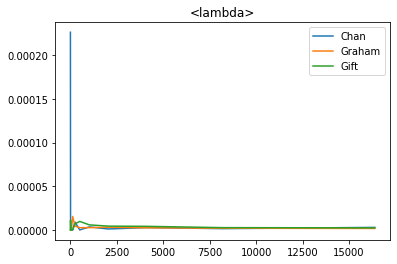

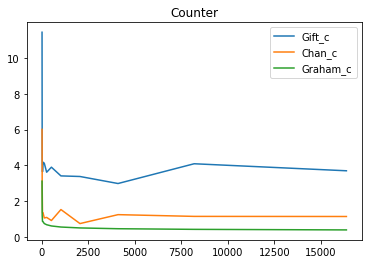

Chan counter:  [[8, 36], [16, 58], [32, 119], [64, 249], [128, 580], [256, 1168], [512, 2677], [1024, 5077], [2048, 10108], [4096, 22535], [8192, 37373], [16384, 86141]]
Graham counter [[8, 17], [16, 46], [32, 105], [64, 237], [128, 490], [256, 1003], [512, 2020], [1024, 4069], [2048, 8159], [4096, 16356], [8192, 32740], [16384, 65501]]
Graham counter [[8, 27], [16, 92], [32, 243], [64, 476], [128, 1225], [256, 4199], [512, 8056], [1024, 15240], [2048, 42777], [4096, 114282], [8192, 220806], [16384, 311106]]


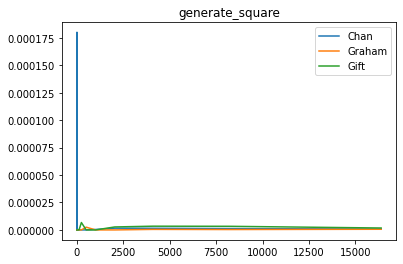

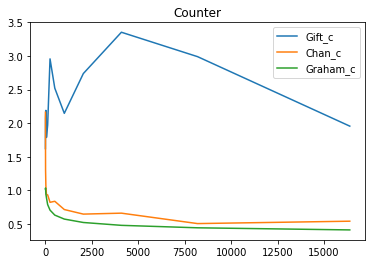

311106
Chan counter:  [[8, 25], [16, 73], [32, 412], [64, 918], [128, 2014], [256, 4483], [512, 11993], [1024, 36884], [2048, 77054], [4096, 158010], [8192, 332128], [16384, 673596]]
Graham counter [[8, 17], [16, 42], [32, 90], [64, 182], [128, 375], [256, 761], [512, 1526], [1024, 3066], [2048, 6137], [4096, 12281], [8192, 24570], [16384, 49145]]


KeyboardInterrupt: 

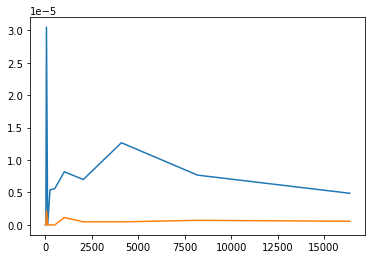

In [38]:
from timeit import Timer
import time
def timeAlgorithm(alg, generator):
    res = []
    res_counter = []
    for i in range(3,12):
        global counter_left_turn
        counter_left_turn = 0
        num_points = 2**i
        random_points = generator(num_points)
        t = Timer("CH_algo")
        start_time = time.time()
        ch = alg(random_points)
        end = time.time()
        res.append([num_points, end-start_time])
        res_counter.append([num_points,counter_left_turn])
    return res, res_counter

def experimentAndPlot(generator):

    res_chan, res_counter_chan = timeAlgorithm(CH_CH, generator)
    print("Chan counter: ", res_counter_chan)
    x, y = list(zip(*res_chan))
    x1, y1 = list(zip(*res_counter_chan))
    adjusted = []
    adjusted_c_chan = []
    for i in range(len(y)):
        adjusted.append((x[i], y[i]/(x[i]*math.log(x[i]))))
        adjusted_c_chan.append((x1[i], y1[i]/(x1[i]*math.log(x1[i]))))
    x, y = list(zip(*adjusted))
    plt.plot(x,y, label="Chan")
    plt.legend

    res_graham, res_c_graham = timeAlgorithm(INC_CH_upper, generator)
    print("Graham counter", res_c_graham)
    x, y = list(zip(*res_graham))
    x1, y1 = list(zip(*res_c_graham))

    adjusted = []
    adjusted_c_graham = []
    for i in range(len(y)):
        adjusted.append((x[i], y[i]/(x[i]*math.log(x[i]))))
        adjusted_c_graham.append((x1[i], y1[i]/(x1[i]*math.log(x1[i]))))
    x, y = list(zip(*adjusted))
    plt.plot(x,y, label="Graham")

    res_gift, res_c_gift = timeAlgorithm(GIFT_CH, generator)
    print("Gift counter", res_c_gift)
    x, y = list(zip(*res_gift))
    x1, y1 = list(zip(*res_c_gift))

    adjusted = []
    adjusted_c_gift = []
    for i in range(len(y)):
        adjusted.append((x[i], y[i]/(x[i]*math.log(x[i]))))
        adjusted_c_gift.append((x1[i], y1[i]/(x1[i]*math.log(x1[i]))))
    x, y = list(zip(*adjusted))
    plt.plot(x,y, label="Gift")
    plt.title(generator.__name__)
    plt.legend()
    plt.show()

    x1,y1 = list(zip(*adjusted_c_gift))
    plt.plot(x1,y1, label="Gift_c")
    x1,y1 = list(zip(*adjusted_c_chan))
    plt.plot(x1,y1, label="Chan_c")
    x1, y1 = list(zip(*adjusted_c_graham))
    plt.plot(x1,y1, label="Graham_c")
    plt.title("Counter")
    plt.legend()
    plt.show()


test = lambda x : generate_fixed_sized_disk(x, 20)
experimentAndPlot(test)
experimentAndPlot(generate_square)
print(counter_left_turn)
experimentAndPlot(generate_circle_circumference)
experimentAndPlot(generate_circle)
# experimentAndPlot(generate_fixed_sized_disk(h=10, n=1000))

In [ ]:
for i in range(9,10):
    print(i)
    for j in range(100):
        # print(i)
        pts = generate_square(2**i)
        UH_graham = INC_CH_upper(pts)
        UH_chan = CH_CH(pts)
        UH_gift = GIFT_CH(pts)
        H_graham = INC_CH(pts)
        H_gift = GIFT_CH(pts)
        if(UH_graham!=UH_chan[:-1]):
            print(UH_graham)
            print(UH_chan)
        assert(UH_graham==UH_chan[:-1])
        assert(list(dict.fromkeys(H_graham))==list(dict.fromkeys(H_gift)))

In [ ]:
import numpy as np
arr = np.genfromtxt('failing_case.txt', delimiter=' ')    
pts = arr.tolist()
print(pts)

In [ ]:
p = [0.1847807375594075, 0.15663034943280751]
UH_chan = CH_CH(pts)
hull = INC_CH_upper(pts)

tangent_points = compute_tangent(hull, p)
tangent_points_bin = compute_tangent_binary(hull, p)

print(hull)
print(tangent_points)
print(tangent_points_bin)


In [ ]:
n = 100
h = 12
import math
m = math.ceil(n/h)
points = [i for i in range(n)]
[len(points[h*i:h*(i+1)]) for i in range(m) ]

In [ ]:
upper_hulls = [[(1,2),(3,4)],[(5,6),(7,8)]]
[p for hull in upper_hulls for p in hull]

In [ ]:
def compute_tangent(pts, p):
    q = pts[0] if not pts[0] == p else pts[1]
    for z in pts:
        if z == q or z == p:
            continue
        if not left_turn(p,z,q):
            q = z
    return q

pts = generate_square(10)
p = min(pts)
ch = [min(pts),compute_tangent(pts,p)]
plot(pts,ch)